#### About

This notebook shows basic analysis tools

#### Todo 
 - Make memory and computation profiling more similar.
 - Use same datastructures is possible
 - Debug

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

from network_profile import (log_memory, t_profile_net, dataframe_readble, plt_arithmetic_intensity,plt_memory,plot_time_FLOPs_FLOP_MAC)
%matplotlib inline
import network_profile
import numpy as np
import pandas as pd
import network
torch.backends.cudnn.benchmark = True


## Init model and data

In [10]:
model = models.resnet18().cuda()
inp = torch.randn(32, 3, 224, 224).cuda()

### Computation profiling

In [11]:
data = t_profile_net(model,inp)
data_sci = dataframe_readble(data)
data_sci.head()

,layer,fw_operation (FLOP),forward_time (s),forward_effi (FLOPs),bw_operation (FLOP),backward_time (s),backward_effi (FLOPs),bw_time/fw_time,input_size,output_size,Mac
0,Conv2d,118.01 M,628.74 µ,187.70 G,236.03 M,1.46 m,162.09 G,2.315962,"(32, 3, 224, 224)","(32, 64, 112, 112)",30.52 M
1,BatchNorm2d,25.69 M,622.18 µ,41.29 G,25.69 M,991.23 µ,25.92 G,1.593174,"(32, 64, 112, 112)","(32, 64, 112, 112)",51.38 M
2,ReLU,25.69 M,391.84 µ,65.56 G,25.69 M,568.03 µ,45.23 G,1.449651,"(32, 64, 112, 112)","(32, 64, 112, 112)",51.38 M
3,MaxPool2d,25.69 M,348.45 µ,73.73 G,25.69 M,841.22 µ,30.54 G,2.414188,"(32, 64, 112, 112)","(32, 64, 56, 56)",32.11 M
4,Conv2d,115.61 M,679.52 µ,170.13 G,231.21 M,1.34 m,173.15 G,1.965059,"(32, 64, 56, 56)","(32, 64, 56, 56)",12.88 M


### Plot model efficiency

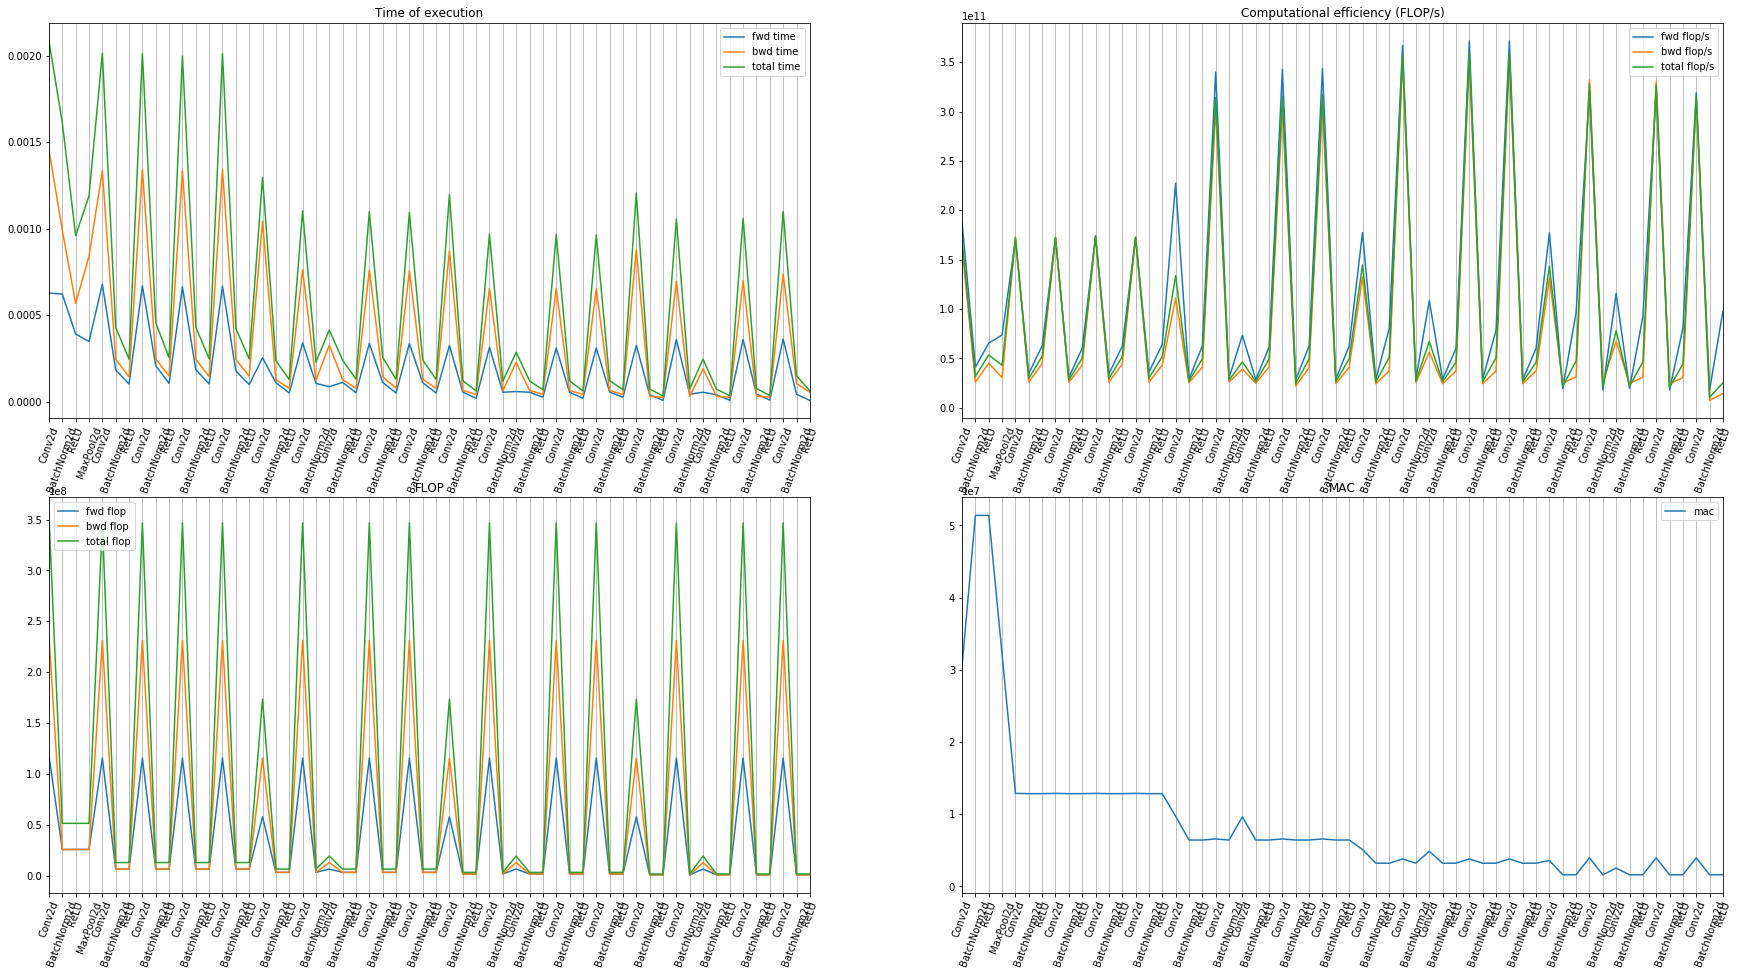

In [12]:
plot_time_FLOPs_FLOP_MAC(data)

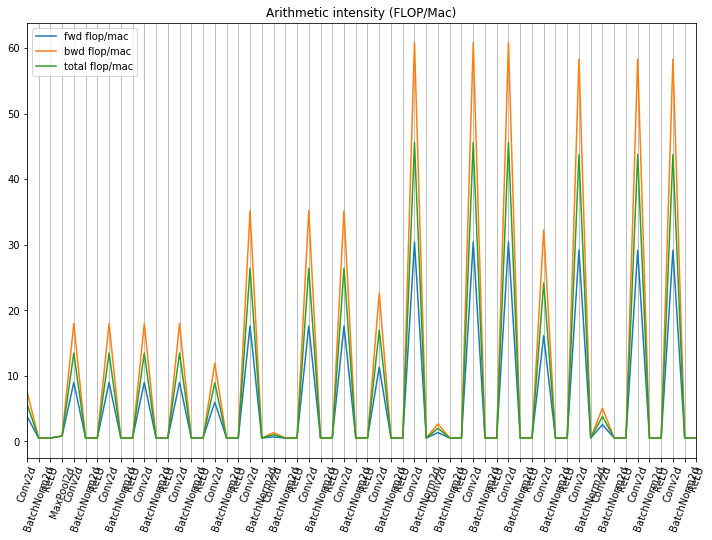

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
plt_arithmetic_intensity(data, mode="fwd", ax=ax)
plt_arithmetic_intensity(data, mode="bwd", ax=ax)
plt_arithmetic_intensity(data, mode="total", ax=ax)

### Convolutions only

In [14]:
data_conv = data[data.layer == "Conv2d"]
data_conv

,layer,fw_operation (FLOP),forward_time (s),forward_effi (FLOPs),bw_operation (FLOP),backward_time (s),backward_effi (FLOPs),bw_time/fw_time,input_size,output_size,Mac
0,Conv2d,118013952,0.000629,1.877003e+11,236027904,0.001456,1.620927e+11,2.315962,"(32, 3, 224, 224)","(32, 64, 112, 112)",30516416
4,Conv2d,115605504,0.000680,1.701282e+11,231211008,0.001335,1.731533e+11,1.965059,"(32, 64, 56, 56)","(32, 64, 56, 56)",12881920
7,Conv2d,115605504,0.000670,1.724343e+11,231211008,0.001341,1.723564e+11,2.000905,"(32, 64, 56, 56)","(32, 64, 56, 56)",12881920
10,Conv2d,115605504,0.000664,1.741972e+11,231211008,0.001335,1.731659e+11,2.011910,"(32, 64, 56, 56)","(32, 64, 56, 56)",12881920
13,Conv2d,115605504,0.000669,1.727642e+11,231211008,0.001342,1.722987e+11,2.005404,"(32, 64, 56, 56)","(32, 64, 56, 56)",12881920
16,Conv2d,57802752,0.000254,2.273837e+11,115605504,0.001042,1.109816e+11,4.097684,"(32, 64, 56, 56)","(32, 128, 28, 28)",9707520
19,Conv2d,115605504,0.000340,3.399200e+11,231211008,0.000763,3.029621e+11,2.243977,"(32, 128, 28, 28)","(32, 128, 28, 28)",6569984
21,Conv2d,6422528,0.000087,7.354478e+10,12845056,0.000327,3.925362e+10,3.747160,"(32, 64, 56, 56)","(32, 128, 28, 28)",9641984
24,Conv2d,115605504,0.000337,3.425958e+11,231211008,0.000762,3.033565e+11,2.258701,"(32, 128, 28, 28)","(32, 128, 28, 28)",6569984
27,Conv2d,115605504,0.000336,3.435742e+11,231211008,0.000758,3.050859e+11,2.252311,"(32, 128, 28, 28)","(32, 128, 28, 28)",6569984


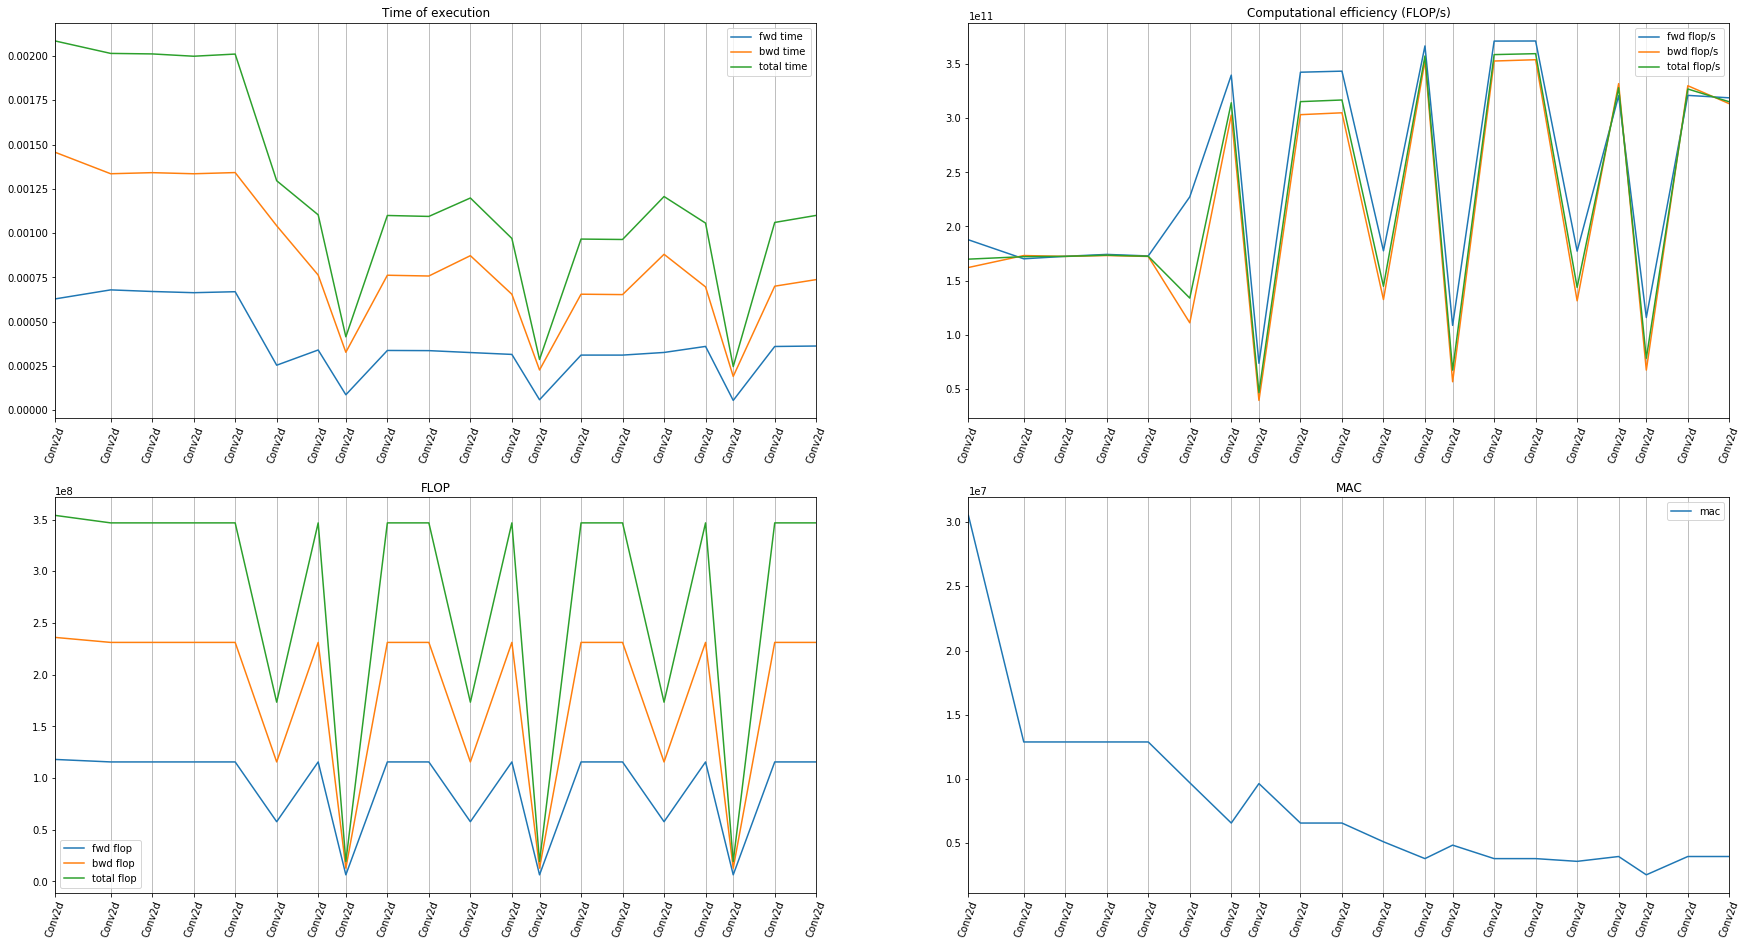

In [15]:
plot_time_FLOPs_FLOP_MAC(data_conv)

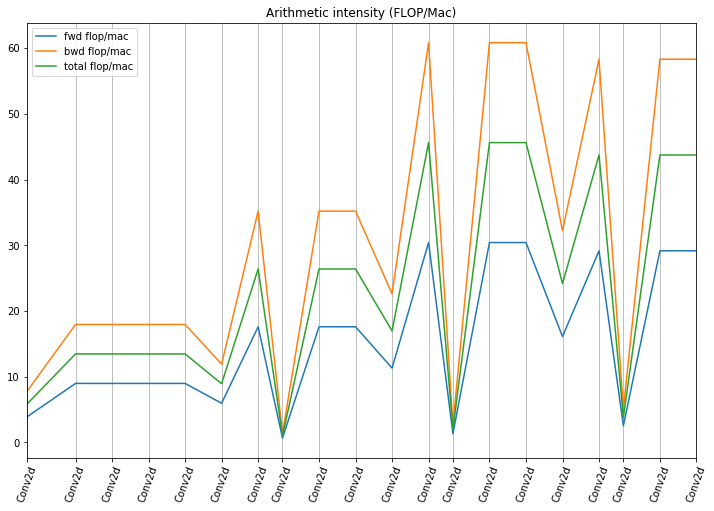

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
plt_arithmetic_intensity(data_conv, mode="fwd", ax=ax)
plt_arithmetic_intensity(data_conv, mode="bwd", ax=ax)
plt_arithmetic_intensity(data_conv, mode="total", ax=ax)

### ==================================

### Memory profiling

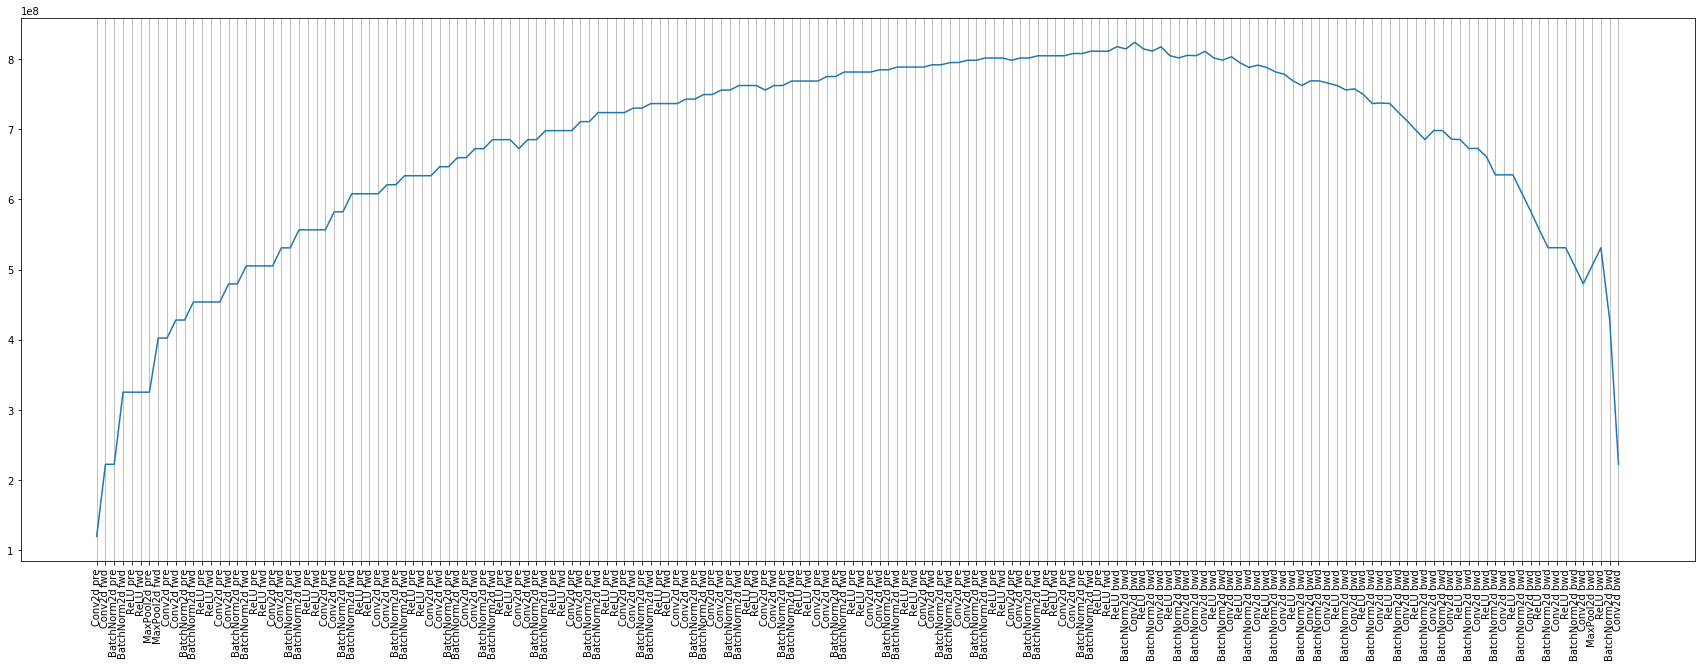

In [17]:
mem = log_memory(model, inp)
plt_memory(mem)